# Question 3

## Data Description

Wage dataset contains the income survey information for a group of males
from Atlantic region of the United States.

- Data: ' Wage dataset.csv ' has the numerical data from ' Wage original.csv ' extracted
(except the 1st column). The data consist of 3000 instances, 9 attributes (including the age
and education and the calendar year )+ 2 columns giving the natural log of the wage, wage
respectively

Problem: We wish to understand the association between an employees age and education, as well
as the calendar year, on his wage. Perform polynomial regression on age vs wage, year vs wage, plot
education vs wage. Provide description of your observations on the variation of wage as a function
of each these attributes. Can we get an accurate prediction of a particular man0
s wage from one of
these 3 attributes alone

## Importing Libraries

In [209]:
import numpy as np
from matplotlib import pyplot as plt

## Importing data

In [210]:
filename = 'Wage_dataset.csv'
data= np.loadtxt(filename, delimiter=',')
print(data.shape)

(3000, 11)


In [211]:
X = data[:,0:9]
y = data[:,-1]
# 10th column can just be called as np.log(y)
# columns and corresponding labels
'''
X[:,i]
0     = year 
1     = age
2     = maritl 
3     = race 
4     = education 
5     = region
6     = jobclass
8     = health 
9     = health_ins 

'''
year = X[:,0]
age= X[:,1]
maritl = X[:,2]
race = X[:,3]
education  = X[:,4]
region= X[:,5]
jobclass= X[:,6]
health = X[:,7]
health_ins = X[:,8]


## Defining a Polynomial Regression Model

We will experiment with 3rd order regression, just extending the ideas of the following Quadratic model.<br>

![alternative text](Quadratic_Regression_Model.PNG)


[IMG SRC: [*Quadratic Regression Calculator*](https://ezcalc.me/quadratic-regression-calculator/#:~:text=A%20quadratic%20regression%20is%20the%20process%20of%20finding,function%20is%20the%20best%20approximation%20of%20the%20data.)]<br>
3rd order polynomial regression  model 
$$\begin{equation}
y = a + b x + c x^2 + d x^3
\end{equation}$$

Following similar logic, solution to the following regression would be solution to the four equations
$$\begin{equation}
a\sum_{i=1}^{n}{x_i^3} + b\sum_{i=1}^{n}{x_i^2} + c\sum_{i=1}^{n}{x_i} + dn = \sum_{i=1}^{n}{y_i}
\end{equation}$$
$$\begin{equation}
a\sum_{i=1}^{n}{x_i^4} + b\sum_{i=1}^{n}{x_i^3} + c\sum_{i=1}^{n}{x_i^2} + d\sum_{i=1}^{n}{x_i} = \sum_{i=1}^{n}{x_{i}y_{i}}
\end{equation}$$
$$\begin{equation}
a\sum_{i=1}^{n}{x_i^5} + b\sum_{i=1}^{n}{x_i^4} + c\sum_{i=1}^{n}{x_i^3} + d\sum_{i=1}^{n}{x_i^2} = \sum_{i=1}^{n}{x_{i}^{2}y_i}
\end{equation}$$
$$\begin{equation}
a\sum_{i=1}^{n}{x_i^6} + b\sum_{i=1}^{n}{x_i^5} + c\sum_{i=1}^{n}{x_i^4} + d\sum_{i=1}^{n}{x_i^3} = \sum_{i=1}^{n}{x_{i}^{3}y_i}
\end{equation}$$

In [212]:
def order_3_regression (x,y):
    x = np.array(x)
    y = np.array(y)
    
    assert x.shape == y.shape , 'x and y are different sizes'
    n = x.size
    coeff_X = np.zeros([7,1])
    XY =np.zeros([4,1])
    #_________________________________________________________________________________
    for i in range(n):
        for j in range(7):
            coeff_X[j] += x[i]**j
        for k in range(4):
            XY[k] += (x[i]**k)*(y[i])
    #_________________________________________________________________________________
    
    A = np.array([[coeff_X[3],coeff_X[2],coeff_X[1],coeff_X[0]],
                  [coeff_X[4],coeff_X[3],coeff_X[2],coeff_X[1]],
                  [coeff_X[5],coeff_X[4],coeff_X[3],coeff_X[2]],
                  [coeff_X[6],coeff_X[5],coeff_X[4],coeff_X[3]]])
    
    B = XY
    
    return np.linalg.solve(A[:,:,0],B)
    

## Polynomial Regression Model for age

In [213]:
coeffs_age = order_3_regression(age,y) 
print(f' a = {coeffs_age[3]} \n b = {coeffs_age[2]} \n c = {coeffs_age[1]} \n d = {coeffs_age[0]}')


 a = [-75.24391422] 
 b = [10.18999149] 
 c = [-0.16802859] 
 d = [0.00084945]


### Data Visualization

In [214]:
x_age = np.linspace(np.min(age),np.max(age),1000)
a = coeffs_age[3]
b = coeffs_age[2]
c = coeffs_age[1] 
d = coeffs_age[0]
y_est_age = a + b*x_age + c*(x_age**2) + d*(x_age**3)

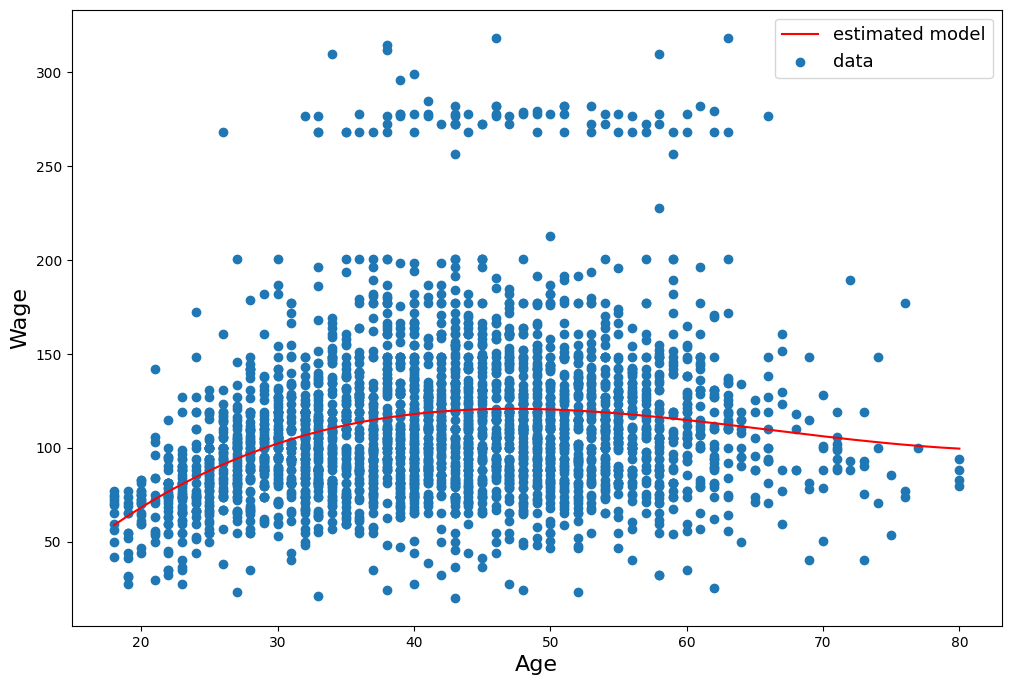

In [215]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.plot(x_age,y_est_age,'r')
ax.scatter(age,y)
ax.set_xlabel('Age',fontsize='16')
ax.set_ylabel('Wage',fontsize='16')
ax.legend(['estimated model','data'],fontsize='13')

plt.show()

## Polynomial Regression Model for education

In [216]:
coeffs_education = order_3_regression(education,y) 
print(f' a = {coeffs_education[3]} \n b = {coeffs_education[2]} \n c = {coeffs_education[1]} \n d = {coeffs_education[0]}')

 a = [67.73388956] 
 b = [20.23449693] 
 c = [-4.68263027] 
 d = [0.79248555]


### Data Visualization

In [217]:
x_edu = np.linspace(np.min(education),np.max(education),1000)
a = coeffs_education[3]
b = coeffs_education[2]
c = coeffs_education[1] 
d = coeffs_education[0]
y_est_edu = a + b*x_edu + c*(x_edu**2) + d*(x_edu**3)

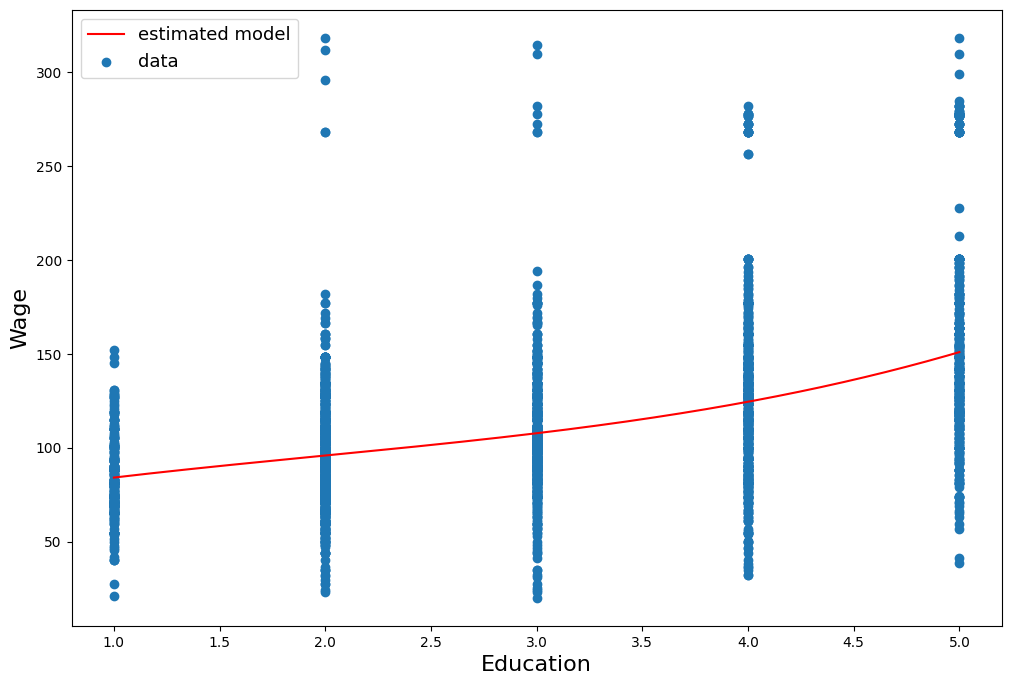

In [218]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.plot(x_edu,y_est_edu,'r')
ax.scatter(education,y)
ax.legend(['estimated model','data'],fontsize='13')
ax.set_xlabel('Education',fontsize='16')
ax.set_ylabel('Wage',fontsize='16')
plt.show()

## Polynomial Regression Model for Year

In [219]:
coeffs_year = order_3_regression(year,y) 
print(f' a = {coeffs_year[3]} \n b = {coeffs_year[2]} \n c = {coeffs_year[1]} \n d = {coeffs_year[0]}')

 a = [-514665.97552997] 
 b = [397.3816351] 
 c = [-0.01307633] 
 d = [-2.8461729e-05]


### Data Visualization

In [220]:
x_year = np.linspace(np.min(year),np.max(year),1000)
a = coeffs_year[3]
b = coeffs_year[2]
c = coeffs_year[1] 
d = coeffs_year[0]
y_est_year = a + b*x_year + c*(x_year**2) + d*(x_year**3)

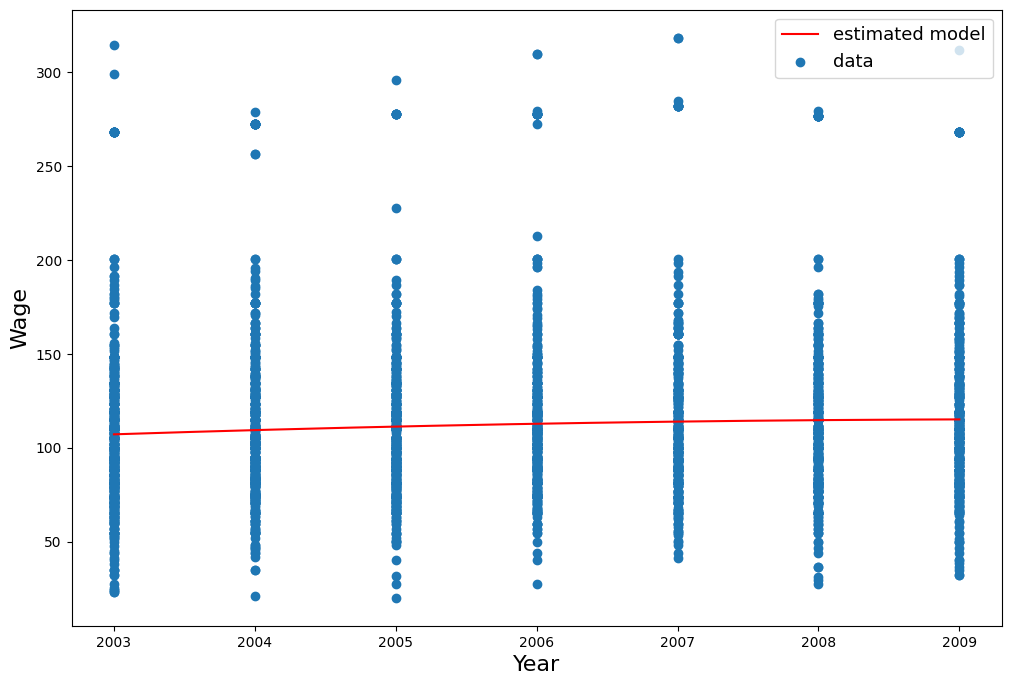

In [221]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
ax.plot(x_year,y_est_year,'r')
ax.scatter(year,y)
ax.legend(['estimated model','data'],fontsize='13')
ax.set_xlabel('Year',fontsize='16')
ax.set_ylabel('Wage',fontsize='16')
plt.show()

## Performance

Using the correlation coefficient we will find a numerical measure for how well we have fit the curve.<br>
R square model for the following regession can be evaluated using the following formula.

$$
\begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^{n}{(y_{i} - a - bx_{i} - cx_{i}^{2} - dx_{i}^{3})^2}}{\sum_{i=1}^{n}{(y_{i} - \frac{\sum_{i=1}^{n}{y_i}}{n})^2}}
\end{equation}
$$

(Higher the correlation between actual data and estimated data the better is the model)

In [222]:
def R2_order_3(x,y):
    coeffs = order_3_regression(x,y)
    a = coeffs[3]
    b = coeffs[2]
    c = coeffs[1] 
    d = coeffs[0]
    y_mean = np.mean(y)
    num,den = 0,0
    for i in range(np.size(y)):
        num += (y[i] - a - b*x[i] - c*x[i]**2 - d*x[i]**3)**2
        den += (y[i] - y_mean)**2
    return 1-(num/den)

In [223]:
R2_age = R2_order_3(age,y)
R2_age = R2_age[0]
R2_edu = R2_order_3(education,y)
R2_edu = R2_edu[0]
R2_year = R2_order_3(year,y)
R2_year = R2_year[0]

print(f'{R2_age = }, {R2_edu = }, {R2_year = }')


R2_age = 0.08510227299209083, R2_edu = 0.2348409342283968, R2_year = 0.004541936081273845


## Conclusion 

A third order polynomial regression is implemented
- Graphically, we can verify that the polynomial best fits the scatter plot.
- High variance in the data leads to bad R square score. 